In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#reading data set
mydata = pd.read_csv('housing.csv')

In [3]:
mydata.head(len(mydata))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [197]:
# import pandas as pd

# # Assuming your dataset is stored in a DataFrame called 'data_set'
# # Drop non-numeric columns if needed


# # Calculate the correlation matrix
# correlation_matrix = housing.corr()

# # Print the correlation matrix
# correlation_matrix

In [15]:
order_data = ['latitude' , 'housing_median_age' , 'total_rooms' , 'median_income' , 'longitude' , 'total_bedrooms' , 'population', 'households' , 'ocean_proximity' , 'median_house_value']
mydata = mydata[order_data]

In [16]:
mydata.head(10)

,latitude,housing_median_age,total_rooms,median_income,longitude,total_bedrooms,population,households,ocean_proximity,median_house_value
0,37.88,41.0,880.0,8.3252,-122.23,129.0,322.0,126.0,NEAR BAY,452600.0
1,37.86,21.0,7099.0,8.3014,-122.22,1106.0,2401.0,1138.0,NEAR BAY,358500.0
2,37.85,52.0,1467.0,7.2574,-122.24,190.0,496.0,177.0,NEAR BAY,352100.0
3,37.85,52.0,1274.0,5.6431,-122.25,235.0,558.0,219.0,NEAR BAY,341300.0
4,37.85,52.0,1627.0,3.8462,-122.25,280.0,565.0,259.0,NEAR BAY,342200.0
5,37.85,52.0,919.0,4.0368,-122.25,213.0,413.0,193.0,NEAR BAY,269700.0
6,37.84,52.0,2535.0,3.6591,-122.25,489.0,1094.0,514.0,NEAR BAY,299200.0
7,37.84,52.0,3104.0,3.1200,-122.25,687.0,1157.0,647.0,NEAR BAY,241400.0
8,37.84,42.0,2555.0,2.0804,-122.26,665.0,1206.0,595.0,NEAR BAY,226700.0
9,37.84,52.0,3549.0,3.6912,-122.25,707.0,1551.0,714.0,NEAR BAY,261100.0


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [165]:
# mydata = pd.DataFrame(mydata)

In [17]:
X = mydata.iloc[:,:-1].values
y = mydata.iloc[:,-1].values

In [18]:
print(X.shape , y.shape)

(20640, 9) (20640,)


In [37]:
from sklearn.impute import SimpleImputer

# Create SimpleImputer object to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Reshape X[:, 4] to make it 2-dimensional
X_col_4_reshaped = X[:, 4].reshape(-1, 1)

# Fit and transform the imputer on the reshaped data
X[:, 4] = imputer.fit_transform(X_col_4_reshaped).flatten()

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers= [('encoder' , OneHotEncoder() , [8])] , remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [27]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
from sklearn.preprocessing import StandardScaler
# Create StandardScaler object
sc = StandardScaler()
# Fit and transform training data
X_train[:, 9:] = sc.fit_transform(X_train[:, 9:])
# Transform test data using the scaler fitted on training data
X_test[:, 9:] = sc.transform(X_test[:, 9:])

In [30]:
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

# Create SimpleImputer object to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the imputer fitted on the training data
X_test_imputed = imputer.transform(X_test)

# Create SVR model
svr = SVR(kernel='linear')

# Train the model on the imputed data
svr.fit(X_train_imputed, y_train)

SVR(kernel='linear')

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

# Define the SVR model
svr = SVR(kernel='linear')

# Define the pipeline with an imputer to handle missing values
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with the mean
    ('svr', svr)  # SVR model
])

# Train the pipeline (including imputation) on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)
y_pred


array([198919.75536954, 160652.24598037, 199535.71325657, ...,
       171290.37046913, 212155.30544577, 193801.4997453 ])

In [39]:
# from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(y_test, y_pred)
# mse

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# svr r2
r2 = r2_score(y_test, y_pred)
print(f'r2 SVR: {r2:.2f}')

r2 SVR: 0.30


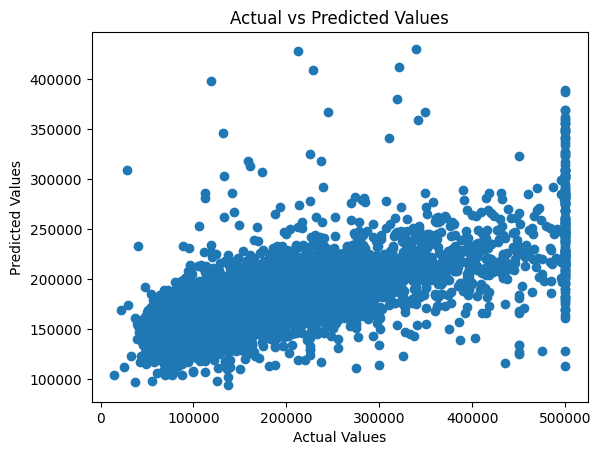

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [1]:


# Step 5: GUI (optional)
# For a GUI, you can use libraries like Tkinter or PyQt to create interactive applications.

# Example GUI code (using Tkinter)
# This is a very basic example. You can extend it as per your requirements.
import tkinter as tk

root = tk.Tk()
root.title("svr")

# Add widgets and functionality here

root.mainloop()